<center> <h1 style="background-color:orange; color:white"><br>Exploratory Data Analysis<br></h1></center>

# `Problem Statement:`
Without analyzing the competition, it is difficult for a business to survive. You are
tasked to analyse the competition for the management to provide better results. This
data set has information on the market capitalization of the top 500 companies in India.

## `Importing the necessary libraries`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## `Load the dataset into dataframe`

In [6]:
df=pd.read_csv(r"C:\Users\PRANAY\Documents\TwinLeran Data science Paid Intership\Internship works\Financial Analytics data.csv")
df.head()

S.No.            Name  Mar Cap - Crore  Sales Qtr - Crore
0      1  Reliance Inds.        583436.72           99810.00
1      2             TCS        563709.84           30904.00
2      3       HDFC Bank        482953.59           20581.27
3      4             ITC        320985.27            9772.02
4      5         H D F C        289497.37           16840.51

In [7]:
# Get the dimensions of the dataframe
df.shape

(488, 4)

In [8]:
# Get the row names of the dataframe
df.index

RangeIndex(start=0, stop=488, step=1)

In [9]:
# base on the PID
df['Name'].unique()

array(['Reliance Inds.', 'TCS', 'HDFC Bank', 'ITC', 'H D F C',
       'Hind. Unilever', 'Maruti Suzuki', 'Infosys', 'O N G C',
       'St Bk of India', 'ICICI Bank', 'Kotak Mah. Bank', 'Coal India',
       'Larsen & Toubro', 'I O C L', 'Bharti Airtel', 'Axis Bank', 'NTPC',
       'Sun Pharma.Inds.', 'Hind.Zinc', 'Wipro', 'HCL Technologies',
       'Vedanta', 'Tata Motors', 'UltraTech Cem.', 'Asian Paints',
       'Power Grid Corpn', 'B P C L', 'IndusInd Bank', 'Bajaj Fin.',
       'Bajaj Auto', 'M & M', 'HDFC Stand. Life', 'Adani Ports',
       'Bajaj Finserv', 'GAIL (India)', 'Avenue Super.', 'Titan Company',
       'JSW Steel', 'Grasim Inds', 'Tata Steel', 'Eicher Motors',
       'Nestle India', 'Godrej Consumer', 'Yes Bank', 'Hero Motocorp',
       'Motherson Sumi', 'SBI Life Insuran', 'General Insuranc',
       'Bharti Infra.', 'Dabur India', 'Bosch', 'Shree Cement',
       'New India Assura', 'H P C L', 'ICICI Pru Life', 'Britannia Inds.',
       'Tech Mahindra', 'Hindalco Inds.',

In [10]:
# Get the column names of the dataframe
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore'], dtype='object')

In [11]:
# Look at basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    488 non-null    float64
 3   Sales Qtr - Crore  488 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


# Observations:

1. There are 488 Names in the data set.

2. There are 4 features in the data set including the "Name" feature.

3. There are missing values in the data set Mar Cap - Crore is 9 and Sales Qtr - Crore is 29.

4. There are 1 interger, 1 object and 2 floats in dataset.

## `Dropping irrevalent columns`
If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.

In [12]:
# drop the irrevalent cols and print the head of the dataframe
df.drop('S.No.',axis=1,inplace=True)
# print df head
df.head()

Name  Mar Cap - Crore  Sales Qtr - Crore
0  Reliance Inds.        583436.72           99810.00
1             TCS        563709.84           30904.00
2       HDFC Bank        482953.59           20581.27
3             ITC        320985.27            9772.02
4         H D F C        289497.37           16840.51

## `Dropping the null or missing values`

Missing values are usually represented in the form of Nan or null or None in the dataset.

Finding whether we have null values in the data is by using the isnull() function.

There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

In [13]:
# check for nan values in each columns
df.isna().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

As we can see that the Mar Cap - Crore and Sales Qtr - Crore have null values of 9 and 29. As these null values will impact on models' accuracy. So to avoid the impact we will drop the these values.And replace the mdeian and mean values of a particalar columns of datasets

In [14]:
# lets fill nan values and empty values with 0
df.fillna(0)

Name  Mar Cap - Crore  Sales Qtr - Crore
0     Reliance Inds.        583436.72           99810.00
1                TCS        563709.84           30904.00
2          HDFC Bank        482953.59           20581.27
3                ITC        320985.27            9772.02
4            H D F C        289497.37           16840.51
..               ...              ...                ...
483  Lak. Vilas Bank          3029.57             790.17
484            NOCIL          3026.26             249.27
485    Orient Cement          3024.32             511.53
486  Natl.Fertilizer          3017.07            2840.75
487        L T Foods          9885.05            1137.17

[488 rows x 3 columns]

In [15]:
# We have perform our missing values with help of impution of median values.
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median(),inplace=True)

In [16]:
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median(),inplace=True)

In [17]:
# Make sure that missing values are imputer are not
df.isna().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [18]:
#Describe statistics of df
df.describe()

Mar Cap - Crore  Sales Qtr - Crore
count       488.000000         488.000000
mean      27708.961086        3649.076373
std       58963.329098        9708.056797
min        3017.070000           0.000000
25%        4879.612500         570.035000
50%        9885.050000        1137.170000
75%       23400.815000        2580.797500
max      583436.720000      110666.930000

## `outliers`

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

{'whiskers': [<matplotlib.lines.Line2D at 0x2af34e75460>,
 'caps': [<matplotlib.lines.Line2D at 0x2af34e82e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af34e826d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2af34ea1430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af34ea1700>],
 'means': []}

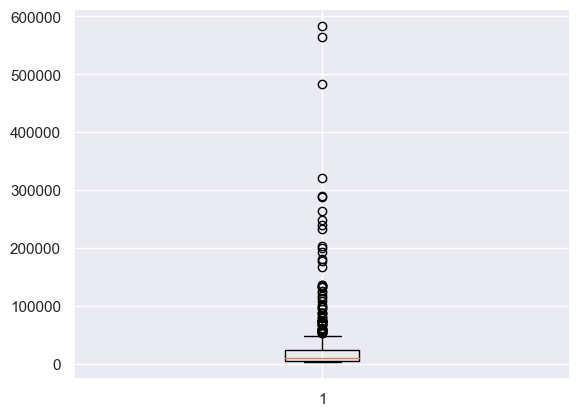

In [19]:
## Plot a boxplot for 'Price' column in dataset. 
plt.boxplot(df['Mar Cap - Crore'])

### **`Observation:`**<br>
Here as you see that we got some values near to 100000 and 600000 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.

{'whiskers': [<matplotlib.lines.Line2D at 0x2af34ec2d60>,
 'caps': [<matplotlib.lines.Line2D at 0x2af34ed4340>,
 'boxes': [<matplotlib.lines.Line2D at 0x2af34ec2a90>],
 'medians': [<matplotlib.lines.Line2D at 0x2af34ed48e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af34ed4bb0>],
 'means': []}

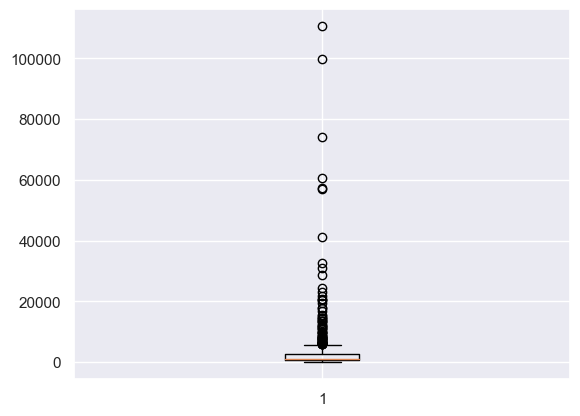

In [20]:
## PLot a boxplot for 'HP' columns in dataset
plt.boxplot(df['Sales Qtr - Crore'])

In [21]:
print(np.percentile(df['Sales Qtr - Crore'],25))
print(np.percentile(df['Sales Qtr - Crore'],75))

570.035
2580.7974999999997


In [22]:
print(np.percentile(df['Mar Cap - Crore'],25))
print(np.percentile(df['Mar Cap - Crore'],75))

4879.6125
23400.815000000002


In [23]:
# Calculate summary statistics for "Market Capitalization"
market_cap_mean = df['Mar Cap - Crore'].mean()
market_cap_median = df['Mar Cap - Crore'].median()
market_cap_std = df['Mar Cap - Crore'].std()
market_cap_min = df['Mar Cap - Crore'].min()
market_cap_max = df['Mar Cap - Crore'].max()

# Calculate summary statistics for "Quarterly Sale"
sales_mean = df['Sales Qtr - Crore'].mean()
sales_median = df['Sales Qtr - Crore'].median()
sales_std = df['Sales Qtr - Crore'].std()
sales_min = df['Sales Qtr - Crore'].min()
sales_max = df['Sales Qtr - Crore'].max()

# Display the summary statistics
print('Market Capitalization:')
print(f'Mean: {market_cap_mean:.2f}')
print(f'Median: {market_cap_median:.2f}')
print(f'Standard deviation: {market_cap_std:.2f}')
print(f'Minimum: {market_cap_min:.2f}')
print(f'Maximum: {market_cap_max:.2f}\n')

print('Sale Capitalization:')
print(f'Mean: {sales_mean:.2f}')
print(f'Median: {sales_median:.2f}')
print(f'Standard deviation: {sales_std:.2f}')
print(f'Minimum: {sales_min:.2f}')
print(f'Maximum: {sales_max:.2f}')

Market Capitalization:
Mean: 27708.96
Median: 9885.05
Standard deviation: 58963.33
Minimum: 3017.07
Maximum: 583436.72

Sale Capitalization:
Mean: 3649.08
Median: 1137.17
Standard deviation: 9708.06
Minimum: 0.00
Maximum: 110666.93


## `Visualising Univariate Distributions`

## Lets Plot Normal Distrubution On Mar Cap - Crore and Sales Qtr - Crore 
We will use seaborn library to visualize eye catchy univariate plots.

Do you know? you have just now already explored one univariate plot. guess which one? Yeah its box plot.

### `Histogram & Density Plots`

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

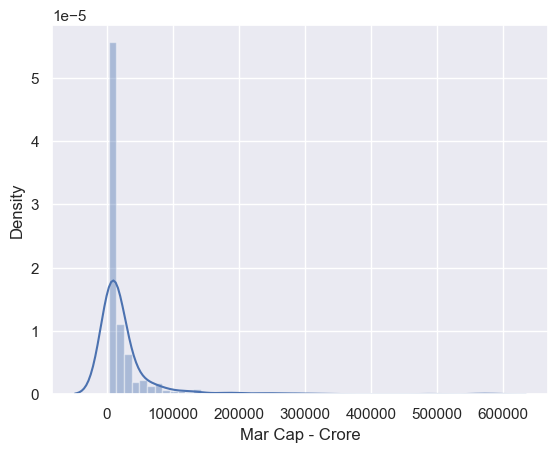

In [64]:
fig=sns.distplot(df['Mar Cap - Crore'])

<AxesSubplot:xlabel='Sales Qtr - Crore', ylabel='Density'>

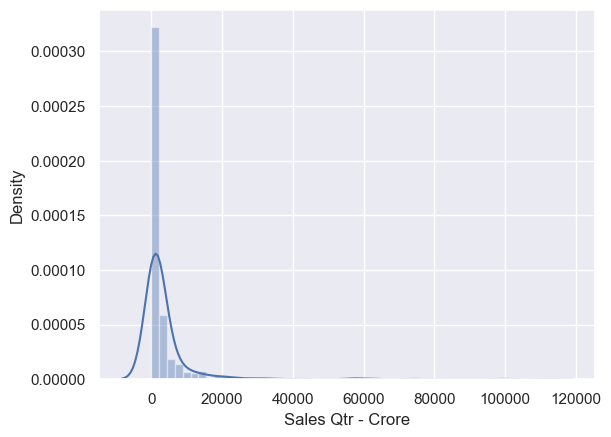

In [65]:
sns.distplot(df['Sales Qtr - Crore'])

### **`Observation:`**
1. We plot the Histogram of feature Mar Cap - Crore with help of distplot in seaborn.<br> 
  In this graph we can see that the datasets of a features is lies in between 0 to 100000.<br>
  It represents the overall distribution of continuous data variables.<br>
2. We plot the Histogram of feature Sales Qtr - Crore with help of distplot in seaborn.<br> 
  In this graph we can see that the datasets of a features is lies in between 0 to 20000.<br>
  It represents the overall distribution of continuous data variables.<br>

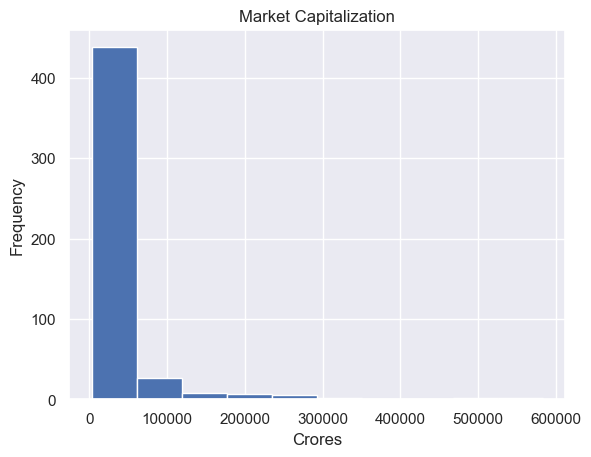

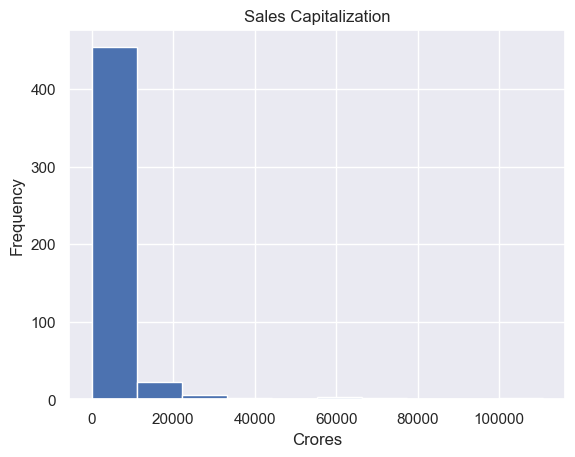

In [66]:
# Create a histogram of "Market Capitalization"
plt.hist(df['Mar Cap - Crore'], bins=10)
plt.title('Market Capitalization')
plt.xlabel('Crores')
plt.ylabel('Frequency')
plt.show()

# Create a histogram of "Quarterly Sale"
plt.hist(df['Sales Qtr - Crore'], bins=10)
plt.title('Sales Capitalization')
plt.xlabel('Crores')
plt.ylabel('Frequency')
plt.show()

### **`Observation:`**
1. The Mar Cap - Crore of the respective companies of revenue lies in between 0 to 290000 crore 
2. the Sales Cap - Crore of the respetive sales of there companies is lies in between 0 to 35000 crore

<AxesSubplot:xlabel='Mar Cap - Crore', ylabel='Count'>

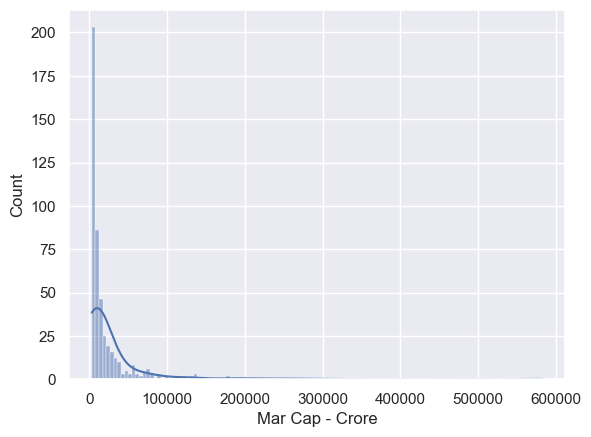

In [67]:
sns.histplot(df['Mar Cap - Crore'], kde= True)

### **`Observation:`**
1. The distribution of market capitalization values appears to be skewed to the right, meaning that there are more companies with lower market capitalization values and relatively fewer companies with higher market capitalization values.

2. The majority of companies have market capitalization values between approximately 0 and 250,000 crores, with a smaller number of companies having market capitalization values above this range.

3. The kernel density estimate plot suggests that the distribution of market capitalization values follows a roughly normal distribution, with a peak around 20,000-30,000 crores.

4. There appear to be a few outliers with very high market capitalization values, which may be worth further investigation.

5. The histogram plot provides a useful overview of the distribution of market capitalization values for the top 500 companies in India, but it is important to consider other variables and perform additional analyses to gain a more complete understanding of the competitive landscape.

<AxesSubplot:xlabel='Sales Qtr - Crore', ylabel='Count'>

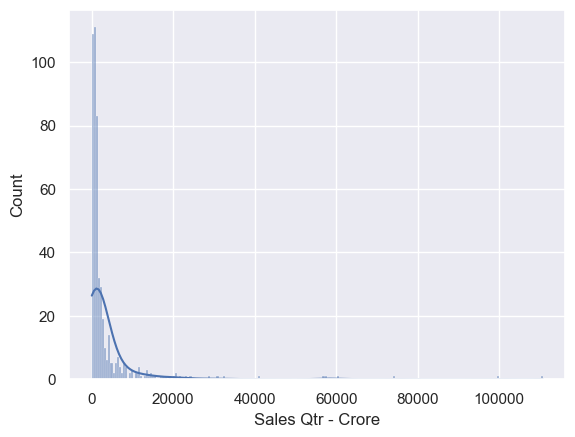

In [68]:
sns.histplot(df['Sales Qtr - Crore'],kde=True)

### **`Observation:`**
1. The distribution of quarterly sales values appears to be highly skewed to the right, meaning that there are more companies with lower quarterly sales values and relatively fewer companies with higher quarterly sales values.

2. The majority of companies have quarterly sales values between approximately 0 and 5,000 crores, with a smaller number of companies having quarterly sales values above this range.

3. The kernel density estimate plot suggests that the distribution of quarterly sales values is not normally distributed, with a long tail to the right indicating the presence of outliers.

4. There appear to be a number of outliers with very high quarterly sales values, which may be worth further investigation.

5. The histogram plot provides a useful overview of the distribution of quarterly sales values for the top 500 companies in India, but it is important to consider other variables and perform additional analyses to gain a more complete understanding of the competitive landscape.







In [69]:
fig = px.histogram(df, x='Mar Cap - Crore')
fig.show()

### **`Visualising Bivariate Distributions:`**

Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.
## `Scatter Plots`
Scatterplots are used to find the correlation between two continuos variables.

Using scatterplot find the correlation between 'HP' and 'Price' column of the data. 


Text(0.5, 1.0, 'Market Capitalization vs. Quarterly Sales')

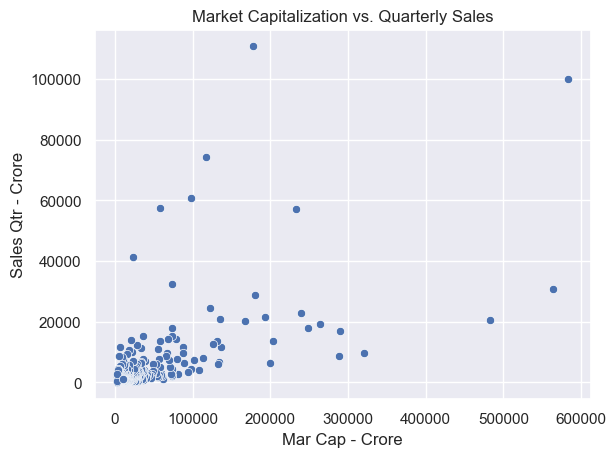

In [30]:
# Visualize the data with a scatter plot
sns.scatterplot(data=df, x='Mar Cap - Crore', y='Sales Qtr - Crore')
plt.title('Market Capitalization vs. Quarterly Sales')

### **`Observation:`**
1. There appears to be a positive correlation between market capitalization and quarterly sales, meaning that companies with higher market capitalization values tend to have higher quarterly sales values.

2. There is a lot of variability in the data, with many companies having lower market capitalization and lower quarterly sales values, while others have very high values for both variables.

3. There are a few outliers with very high market capitalization and quarterly sales values, which may be worth further investigation.

4. The scatter plot provides a useful visual representation of the relationship between market capitalization and quarterly sales, but it is important to perform additional analyses and consider other variables to gain a more complete understanding of the competitive landscape.

5. It may be useful to include additional information, such as company names or industry sector, on the scatter plot to provide more context for the data.

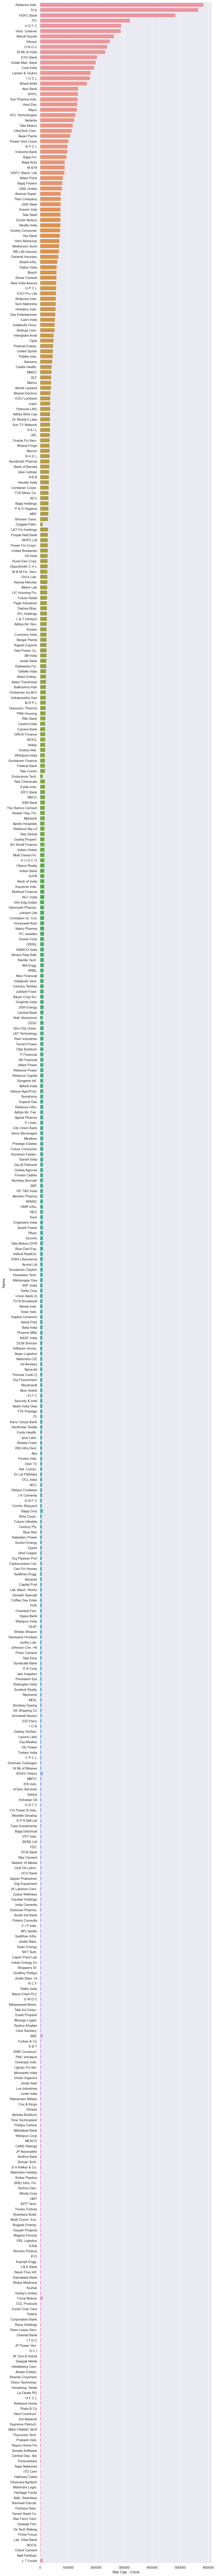

In [31]:
plt.figure(figsize=(10,150))
sns.barplot(y='Name',x='Mar Cap - Crore',data=df)
plt.show()

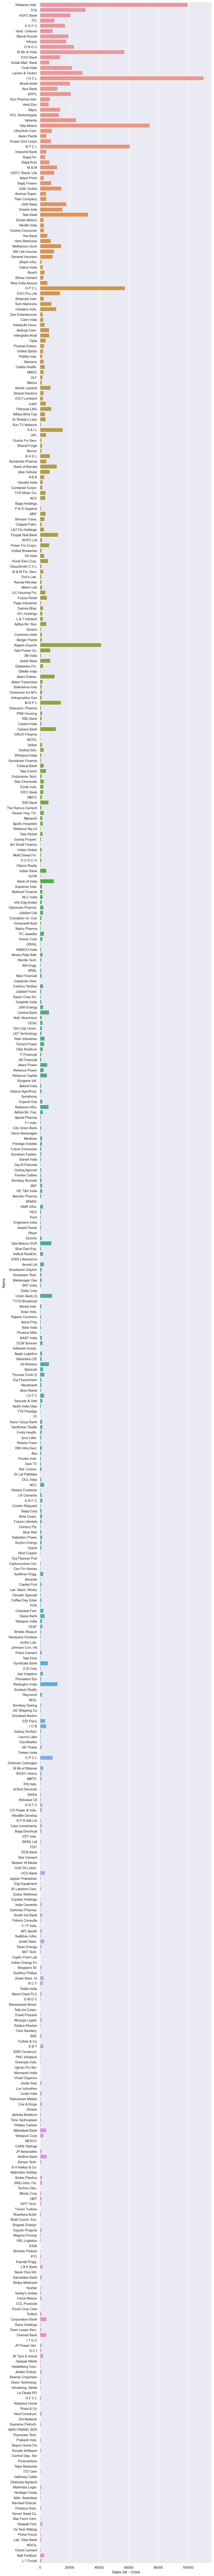

In [32]:
plt.figure(figsize=(10,150))
sns.barplot(x='Sales Qtr - Crore',y='Name',data=df)
plt.show()

### **`Multivariate Plots:`**

## `Heatmaps`


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information
Using heatmaps plot the correlation between the features present in the dataset.


AxesSubplot(0.125,0.11;0.62x0.77)


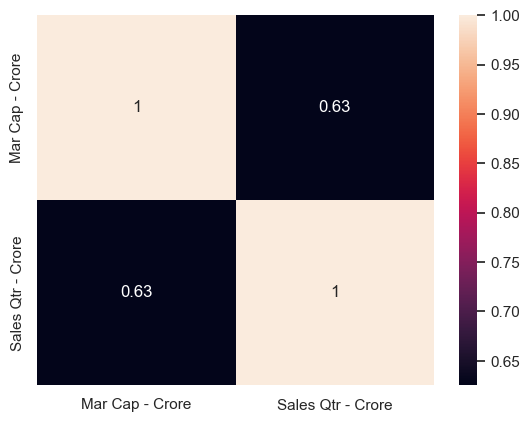

In [33]:
#find the correlation of features of the data 
corr = sns.heatmap(df.corr(),annot=True)
# print corr
print(corr)

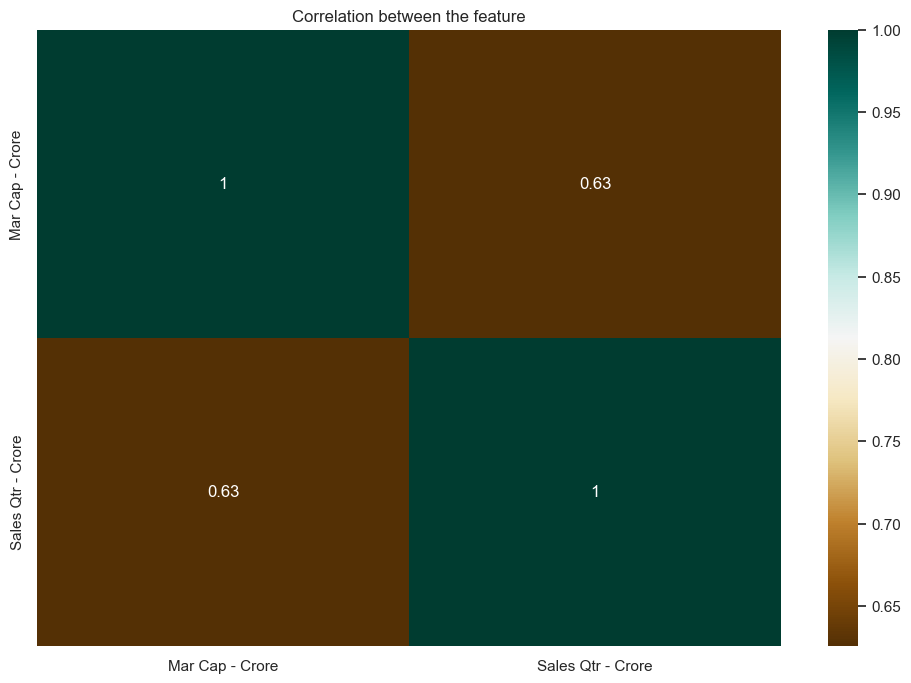

In [34]:
# Using the correlated df, plot the heatmap 
# set cmap = 'BrBG', annot = True - to get the same graph as shown below 
# set size of graph = (12,8)
plt.figure(figsize=(12,8))
corr = sns.heatmap(df.corr(),annot=True,cmap='BrBG')
plt.title("Correlation between the feature")
# print corr
plt.show()

### **`Observation:`**<br>
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.


The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1.

In [55]:
# Print results
print('Mar Cap - Crore mean:', mc_mean)
print('Mar Cap - Crore median:', mc_median)
print('Mar Cap - Crore standard deviation:', mc_std)

Mar Cap - Crore mean: 27708.961086065574


NameError: name 'mc_median' is not defined

In [42]:
from scipy.stats import chi2_contingency

industry_size_table = pd.crosstab(df['Name'], df['Mar Cap - Crore'])

chi_statistic, p_value, dof, expected = chi2_contingency(industry_size_table)
print("Chi-squared statistic:", chi_statistic)
print("P-value:", p_value)

Chi-squared statistic: 233264.0
P-value: 0.24163889248432777


In [43]:
import statsmodels.api as sm

X = sm.add_constant(df['Mar Cap - Crore'])
y = df['Sales Qtr - Crore']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Sales Qtr - Crore   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     312.7
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           2.18e-54
Time:                        11:00:49   Log-Likelihood:                -5050.9
No. Observations:                 488   AIC:                         1.011e+04
Df Residuals:                     486   BIC:                         1.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             794.5769    379.239     

### **`Observation:`**
From the above matrix it show that there is 64% relationship between sales qtr and mar cap

In [44]:
deviations=df.select_dtypes(include='number').apply(lambda x: x.std()/x.mean())
deviations

Mar Cap - Crore      2.127952
Sales Qtr - Crore    2.660415
dtype: float64

In [45]:
df['Sales to Mar Cap Ratio'] = df['Sales Qtr - Crore'] / df['Mar Cap - Crore']

In [46]:
df_sorted = df.sort_values('Sales to Mar Cap Ratio', ascending=False)

In [47]:
df_sorted.head(10)

Name  Mar Cap - Crore  Sales Qtr - Crore  \
320   Redington India          5896.54           11728.40   
122    Rajesh Exports         23495.54           41304.84   
334           C P C L          5427.82            8587.17   
441  Corporation Bank          3716.46            4387.85   
444     Oriental Bank          3674.60            4262.08   
410       Andhra Bank          4067.25            4549.26   
405    Allahabad Bank          4137.11            4243.83   
54            H P C L         58034.78           57474.25   
486   Natl.Fertilizer          3017.07            2840.75   
316    Syndicate Bank          6086.37            5375.57   

     Sales to Mar Cap Ratio  
320                1.989031  
122                1.757986  
334                1.582066  
441                1.180653  
444                1.159876  
410                1.118510  
405                1.025796  
54                 0.990341  
486                0.941559  
316                0.883214

In [48]:
mc_mean = df['Mar Cap - Crore'].mean()
mc_std = df['Mar Cap - Crore'].std()
df['Mar Cap - Crore z-score'] = (df['Mar Cap - Crore'] - mc_mean) / mc_std

sales_mean = df['Sales Qtr - Crore'].mean()
sales_std = df['Sales Qtr - Crore'].std()
df['Sales Qtr - Crore z-score'] = (df['Sales Qtr - Crore'] - sales_mean) / sales_std

In [49]:
df['Combined z-score'] = df['Mar Cap - Crore z-score'] + df['Sales Qtr - Crore z-score']

In [50]:
df_sorted = df.sort_values('Combined z-score', ascending=False)

In [51]:
df_sorted.head(10)

Name  Mar Cap - Crore  Sales Qtr - Crore  \
0   Reliance Inds.        583436.72           99810.00   
14         I O C L        178017.48          110666.93   
1              TCS        563709.84           30904.00   
2        HDFC Bank        482953.59           20581.27   
9   St Bk of India        232763.33           57014.08   
23     Tata Motors        117071.87           74156.07   
27         B P C L         98278.00           60616.36   
54         H P C L         58034.78           57474.25   
4          H D F C        289497.37           16840.51   
6    Maruti Suzuki        263493.81           19283.20   

    Sales to Mar Cap Ratio  Mar Cap - Crore z-score  \
0                 0.171073                 9.424973   
14                0.621663                 2.549186   
1                 0.054823                 9.090411   
2                 0.042615                 7.720809   
9                 0.244944                 3.477659   
23                0.633423                 1.515568   
27                0.616785                 1.196829   
54                0.990341                 0.514317   
4                 0.058172                 4.439851   
6                 0.073183                 3.998839   

    Sales Qtr - Crore z-score  Combined z-score  
0                    9.905270         19.330243  
14                  11.023612         13.572799  
1                    2.807454         11.897865  
2                    1.744138          9.464948  
9                    5.496981          8.974640  
23                   7.262730          8.778297  
27                   5.868042          7.064871  
54                   5.544382          6.058698  
4                    1.358813          5.798664  
6                    1.610428          5.609267

### **`Observation:`**
companies that have a high demand based on their market cap and sales qtr, using z-score normalization to standardize the values of these two variables.

This information help to identify companies that are performing well based on both market capitalization and sales qtr, and make investment decisions accordingly.


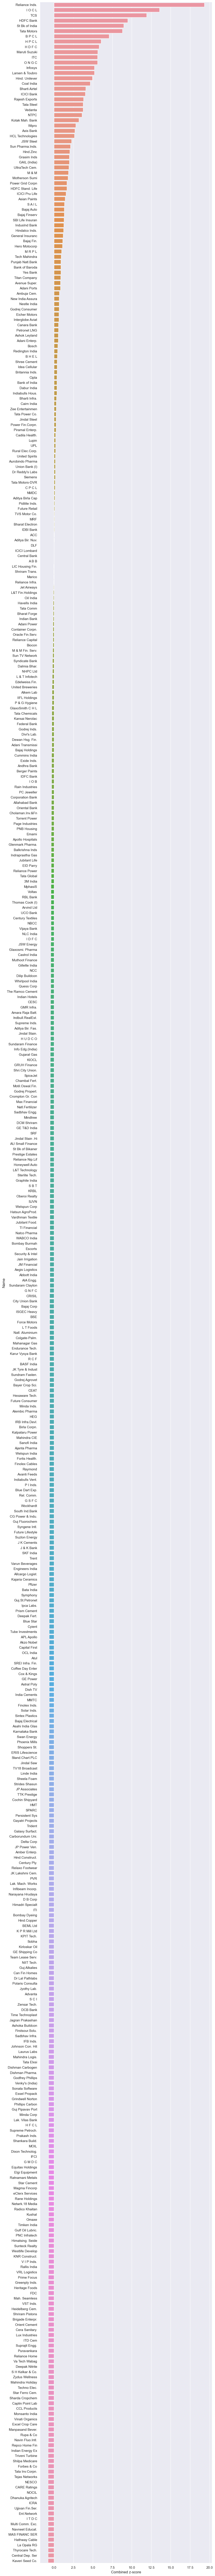

In [52]:
#lets plot the barplot based on above data
plt.figure(figsize=(10,150))
sns.barplot(x='Combined z-score',y='Name',data=df_sorted)
plt.show()

### **`Observation:`**
From the Above chart it clearly show that high demand sales qtr on respective companies
And which is done on market capitalization.

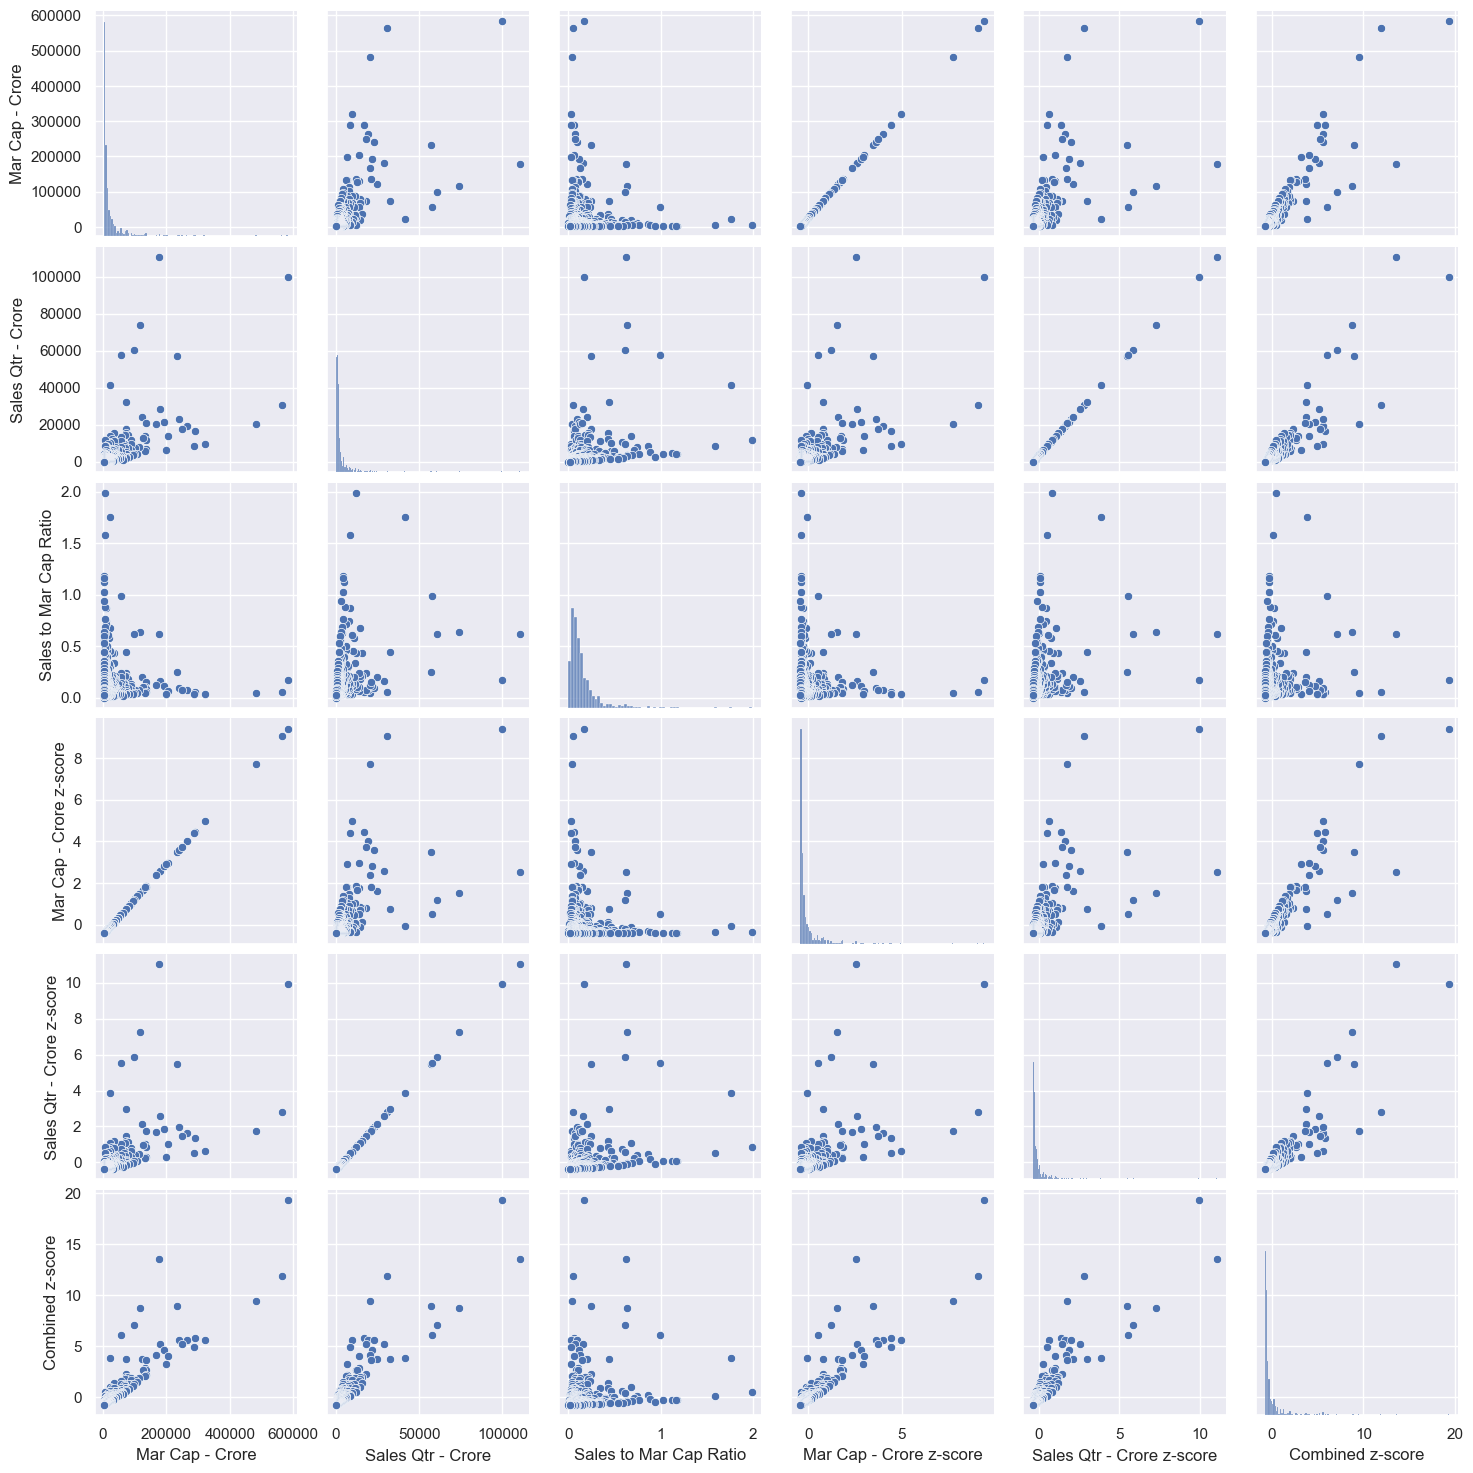

In [53]:
# finally lets see how the data looks
sns.pairplot(df_sorted)

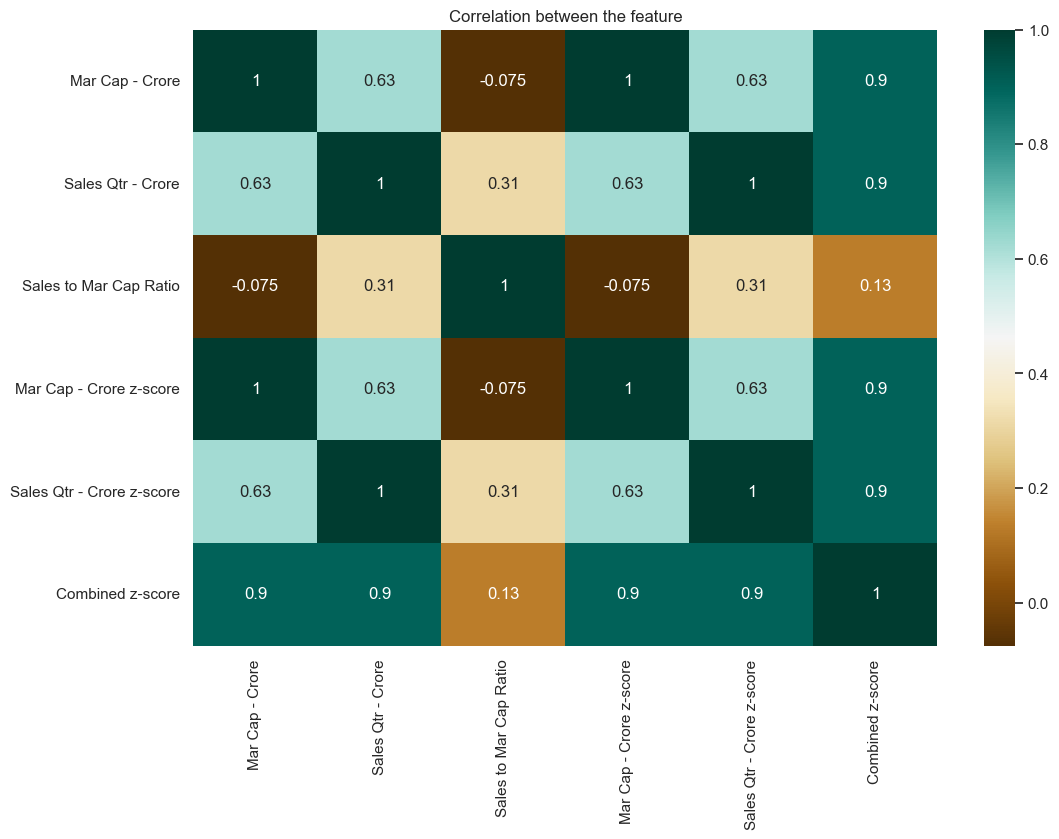

In [54]:
# Using the correlated df, plot the heatmap 
# set cmap = 'BrBG', annot = True - to get the same graph as shown below 
# set size of graph = (12,8)
plt.figure(figsize=(12,8))
corr = sns.heatmap(df_sorted.corr(),annot=True,cmap='BrBG')
plt.title("Correlation between the feature")
# print corr
plt.show()

Overall, the above code can help provide valuable insights into the performance of companies based on their market capitalization and sales quarter, which can be used to make informed decisions and develop effective strategies for growth and success.